###Project Overview
The project focuses on conducting an in-depth analysis of weekly sales driven by various media channels and organic search metrics. In a data-driven marketing landscape, understanding how each channel contributes to sales is crucial for optimizing ROI. The analysis works with a weekly dataset incorporating multiple variables like TV GRPs, radio, newspaper, search clicks, and organic search topics.

###Data Cleaning and Preprocessing
Data cleaning is a crucial step, setting the stage for the entire analysis. In this project, the raw dataset undergoes transformations to deal with any missing or outlier values. Special attention is given to ensuring that all variables are in a suitable format for statistical modeling, specifically as numeric types suitable for regression analysis.

###Exploratory Data Analysis (EDA)
The EDA stage involves diving deep into each variable to understand its distribution, potential outliers, and overall impact on sales. Box plots, scatter plots, and correlation heatmaps are used to visualize the relationships between each independent variable and the dependent variable, sales. Initial findings indicate that variables like 'TV GRPs' and 'radio' have more significant impacts on sales compared to others like 'newspaper' and 'organic search cloud.'

###Modeling and Analysis
An Ordinary Least Squares (OLS) regression model was used for this analysis. The model has an impressively high R-squared value of 0.896 and an adjusted R-squared of 0.890, demonstrating excellent fit. However, it's worth noting that the condition number was extremely high, indicating potential multicollinearity, and the Jarque-Bera test indicated that residuals are not normally distributed. These are areas that may require further investigation.

###Key Insights
The project uncovers that 'TV GRPs' and 'radio' are robust predictors for sales, while 'newspaper' and several organic search metrics seem to have less direct impact. Price elasticity is analyzed to understand how different levels of spending in these channels could affect sales. Additionally, we notice a potential issue of multicollinearity among some variables, indicating a need for further study.

###Recommendations
Based on the findings, businesses should allocate a larger share of their advertising budget to TV and radio advertising. On the flip side, spending on channels with low impact on sales, like newspapers, could be reassessed.

###Conclusion and Future Work
The project provides a comprehensive model to understand how different media and organic metrics contribute to weekly sales. These insights are instrumental for businesses to optimize their marketing spend and improve ROI. Future work could include integrating more granular data, such as demographic information or seasonal trends, to improve the model's accuracy further.

### Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from google.colab import drive
drive.mount("/content/drive")
cash_path = "/content/drive/MyDrive/Projects/23-Impact of Media Channels on Weekly Sales: A Statistical Approach/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load the data

In [2]:
df = pd.read_csv(f'{cash_path}Advertising_5_30.csv', parse_dates=['Week'])
df.drop(columns=['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], inplace=True)
df.set_index('Week', inplace=True)
df.head()

,TV GRPs,radio,newspaper,search clicks,social impressions,email click count,organic search cloud,organic search AI,organic search blockchain,sales
Week,,,,,,,,,,
2018-03-04,230.1,37.8,69.2,25775,72053325,256086,26,6,36,22.1
2018-03-11,44.5,39.3,45.1,57070,148147884,207576,40,97,78,10.4
2018-03-18,17.2,45.9,69.3,14168,115624199,21122,65,39,44,9.3
2018-03-25,151.5,41.3,58.5,7057,212014143,40320,24,31,67,18.5
2018-04-01,180.8,10.8,58.4,75645,58341619,89161,7,97,79,12.9


### Interesting Stats

In [3]:
# Descriptive statistics
df.describe()

,TV GRPs,radio,newspaper,search clicks,social impressions,email click count,organic search cloud,organic search AI,organic search blockchain,sales
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.00000,200.000000
mean,147.042500,23.264000,30.554000,74582.365000,1.149682e+08,126935.520000,49.430000,49.580000,55.10000,14.022500
std,85.854236,14.846809,21.778621,40141.703958,7.108128e+07,75874.679567,29.458686,28.627983,27.16967,5.217457
min,0.700000,0.000000,0.300000,4975.000000,2.833710e+05,139.000000,0.000000,0.000000,0.00000,1.600000
25%,74.375000,9.975000,12.750000,37060.000000,4.827942e+07,57347.250000,24.000000,25.000000,34.00000,10.375000
50%,149.750000,22.900000,25.750000,75586.000000,1.187207e+08,124415.500000,49.500000,51.000000,56.50000,12.900000
75%,218.825000,36.525000,45.100000,110233.500000,1.855144e+08,186211.500000,78.000000,74.000000,79.00000,17.400000
max,296.400000,49.600000,114.000000,139578.000000,2.320046e+08,282575.000000,100.000000,100.000000,99.00000,27.000000


### Outliers



Box Plot of TV GRPs:




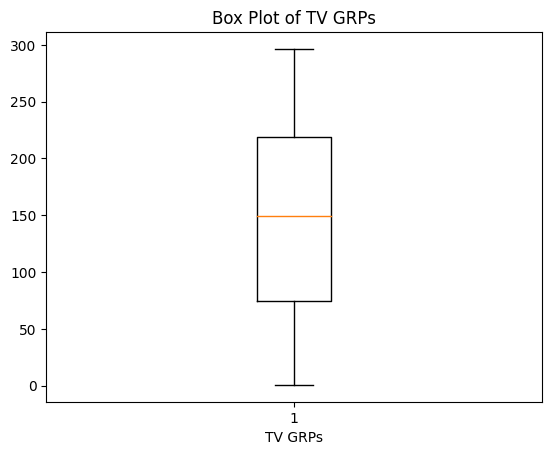



Box Plot of radio:




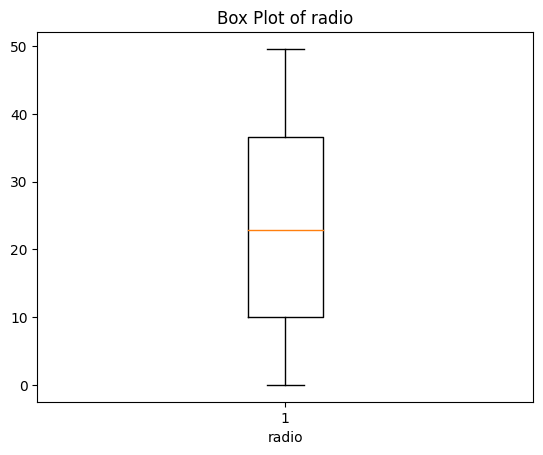



Box Plot of newspaper:




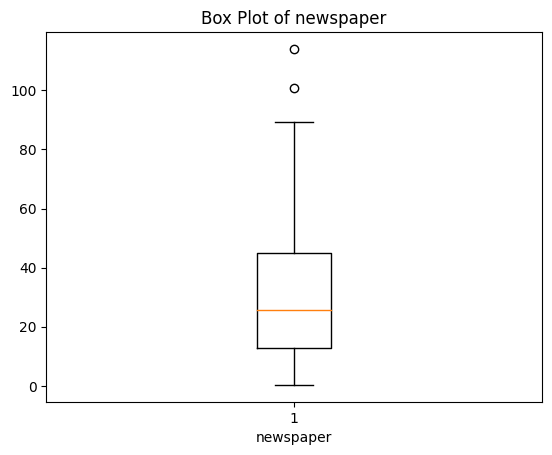



Box Plot of search clicks:




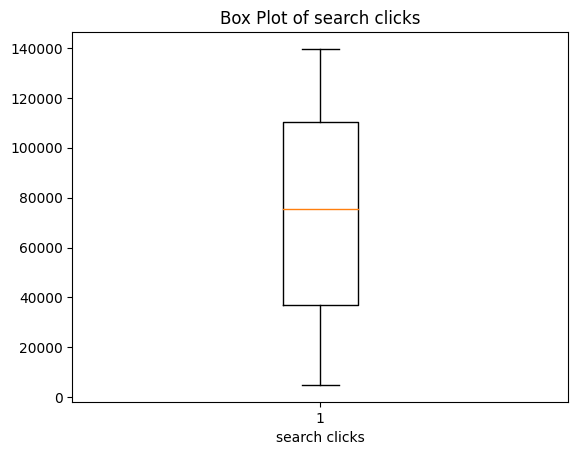



Box Plot of social impressions:




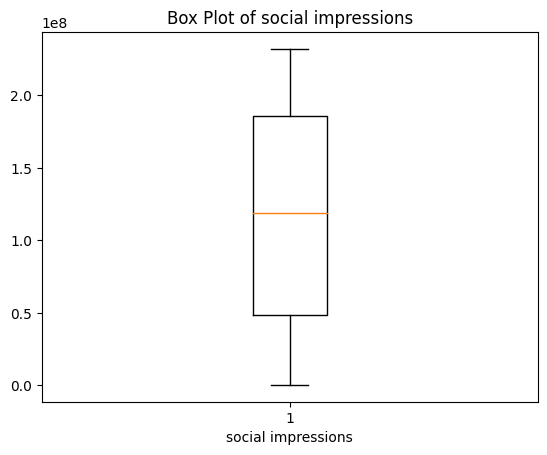



Box Plot of email click count:




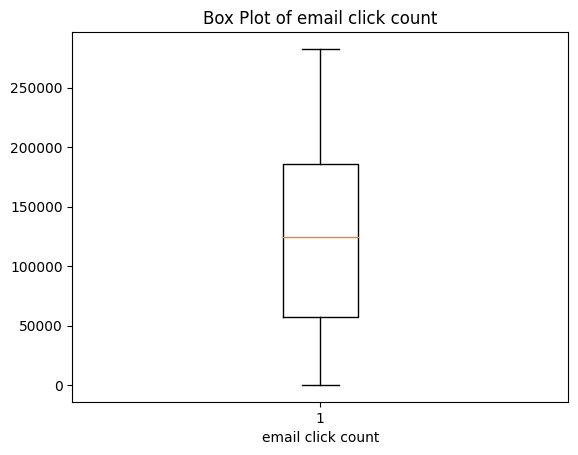



Box Plot of organic search cloud:




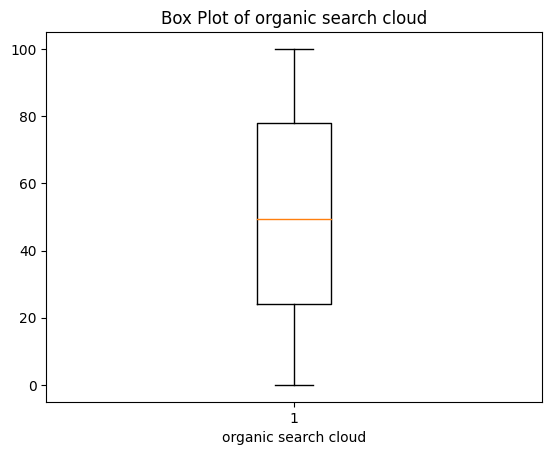



Box Plot of organic search AI:




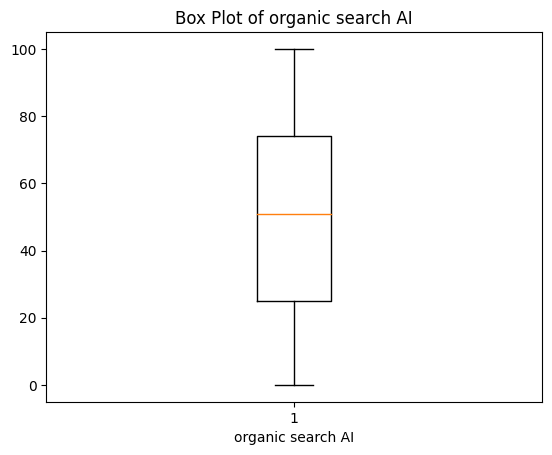



Box Plot of organic search blockchain:




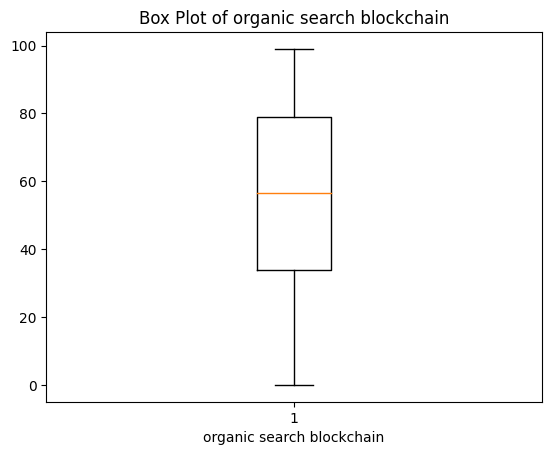

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Box plots for all numeric columns other than 'sales'
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'sales':
        print("\n")
        print(f"Box Plot of {column}:")
        print("\n")
        plt.boxplot(df[column])
        plt.xlabel(column)
        plt.title(f'Box Plot of {column}')
        plt.show()



### Drop rows where any of the values in any column are outliers

In [5]:
from scipy import stats
import numpy as np

# Here, we define outliers as having a Z-score > 3 or < -3
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]

###Exploratory Analysis, Visual Analysis

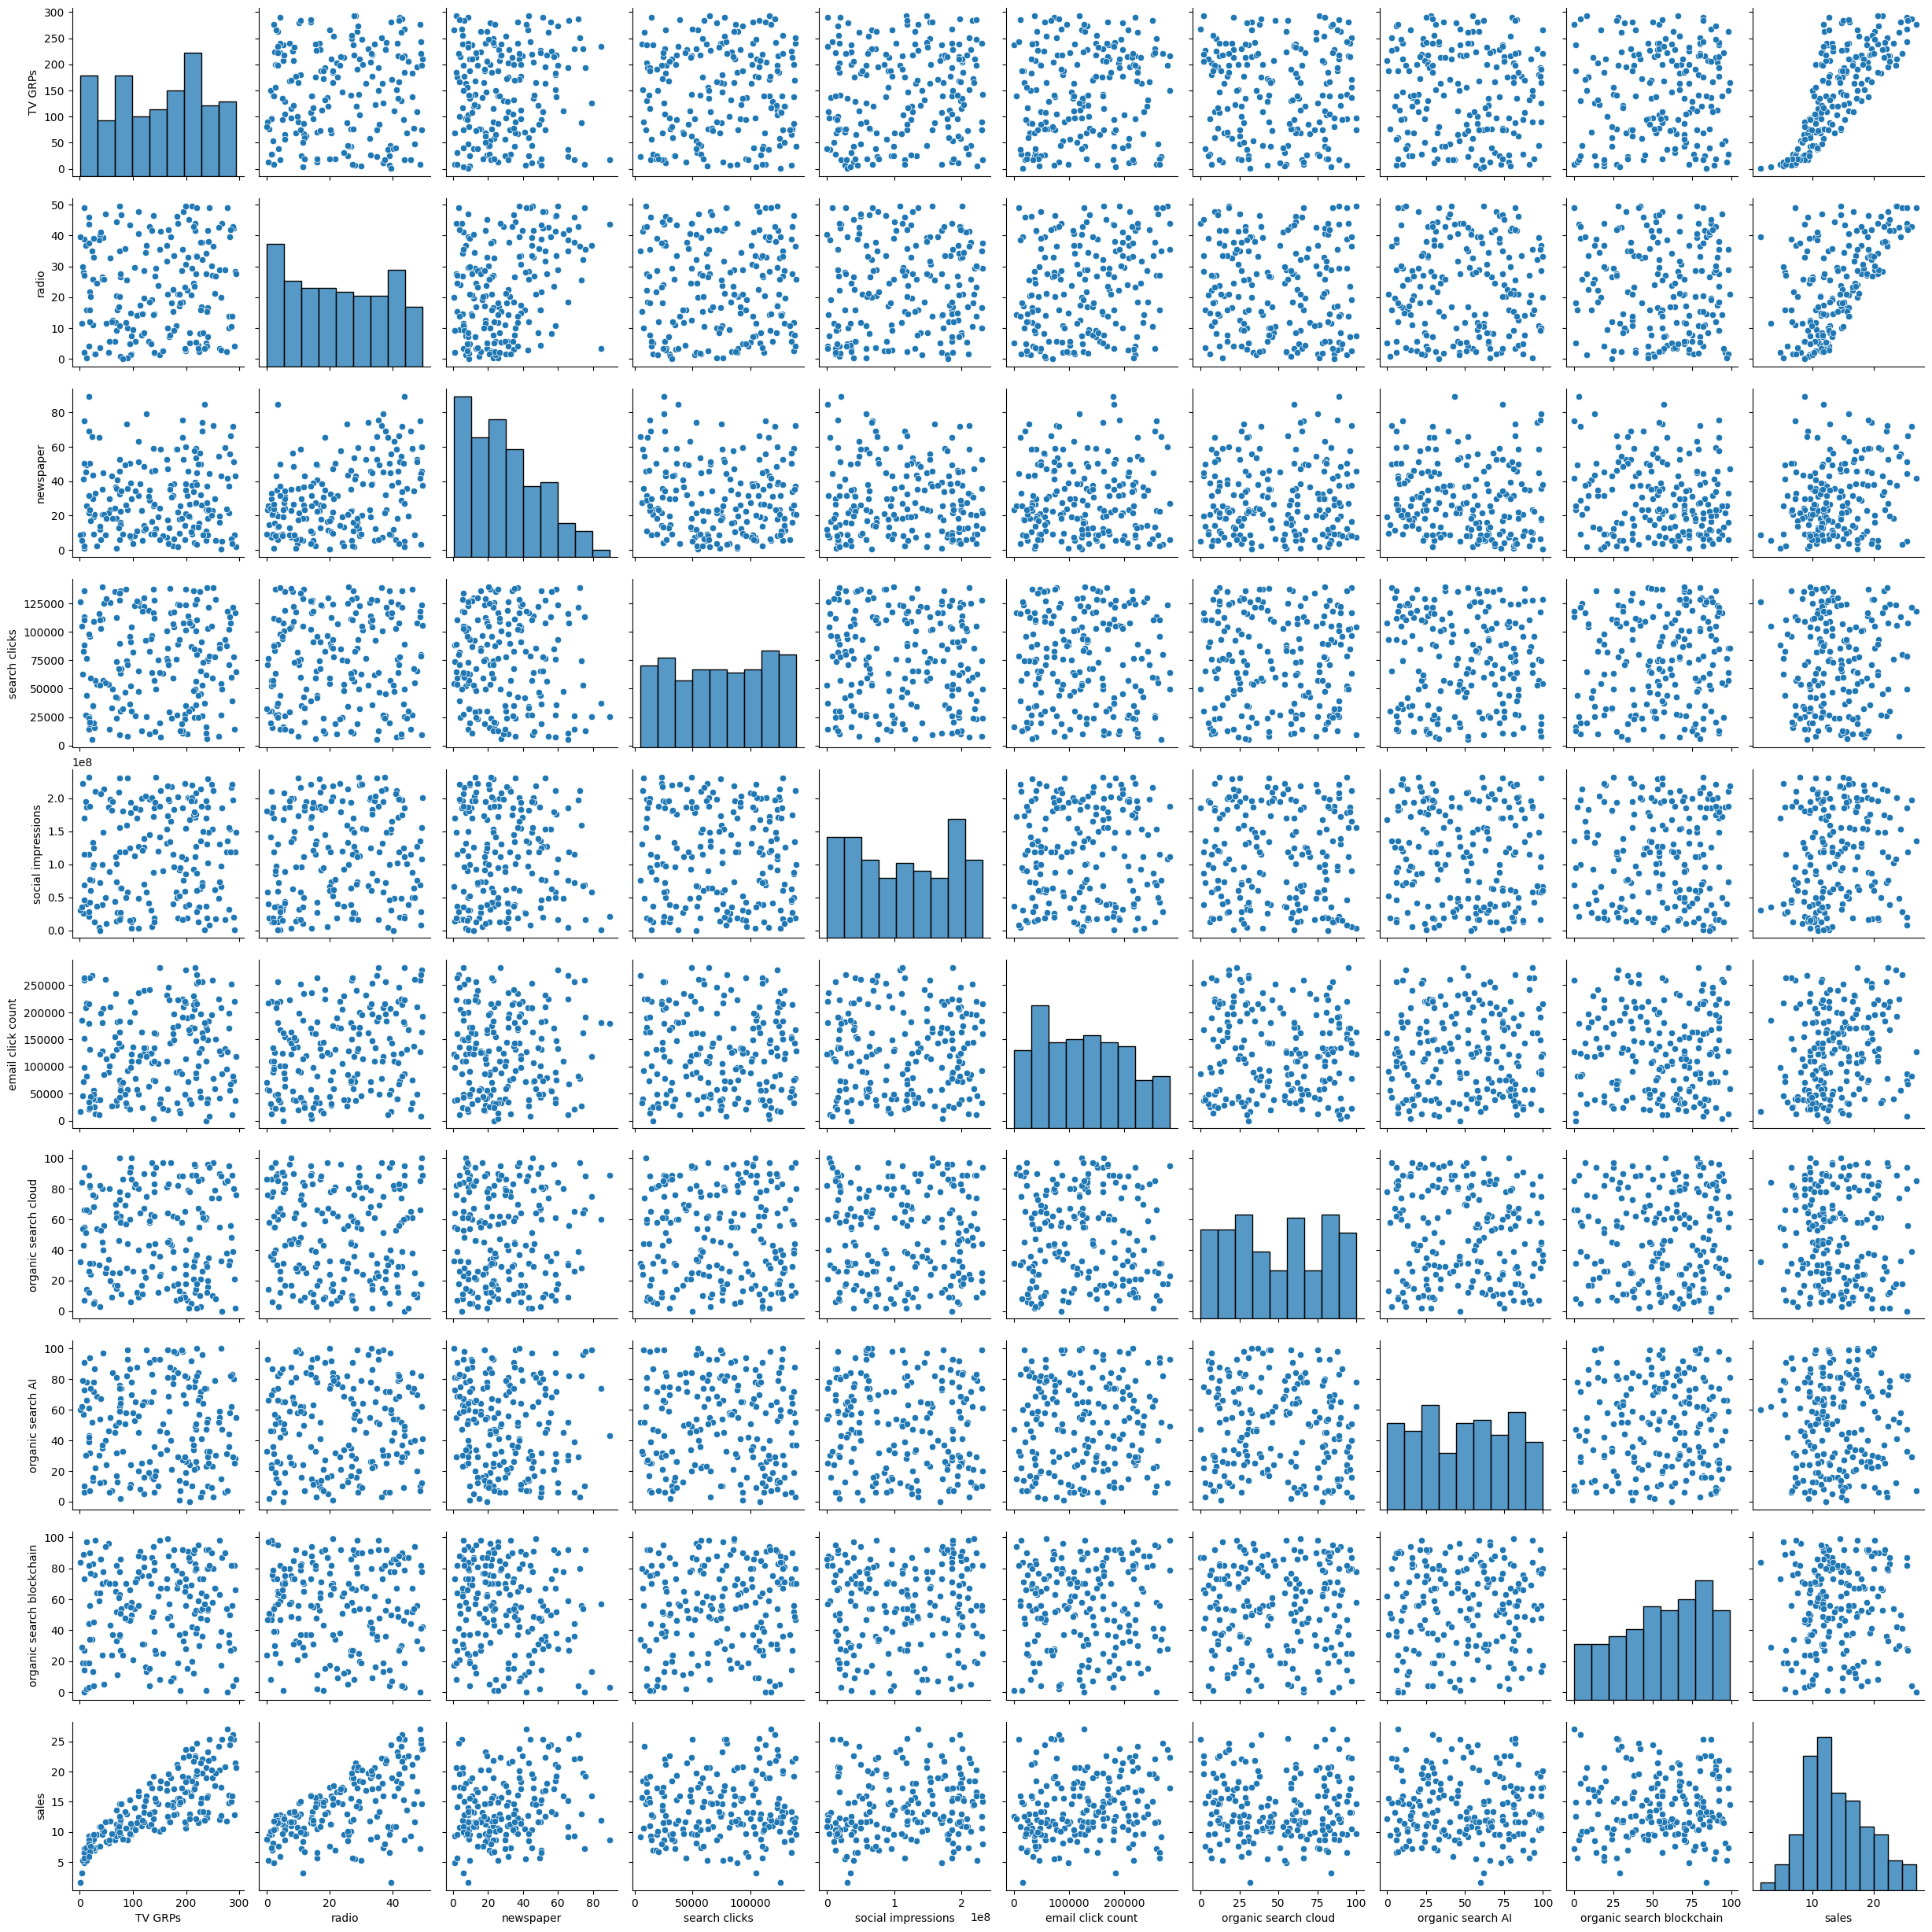

In [6]:
sns.pairplot(df)
plt.show()

### Correlation Analysis

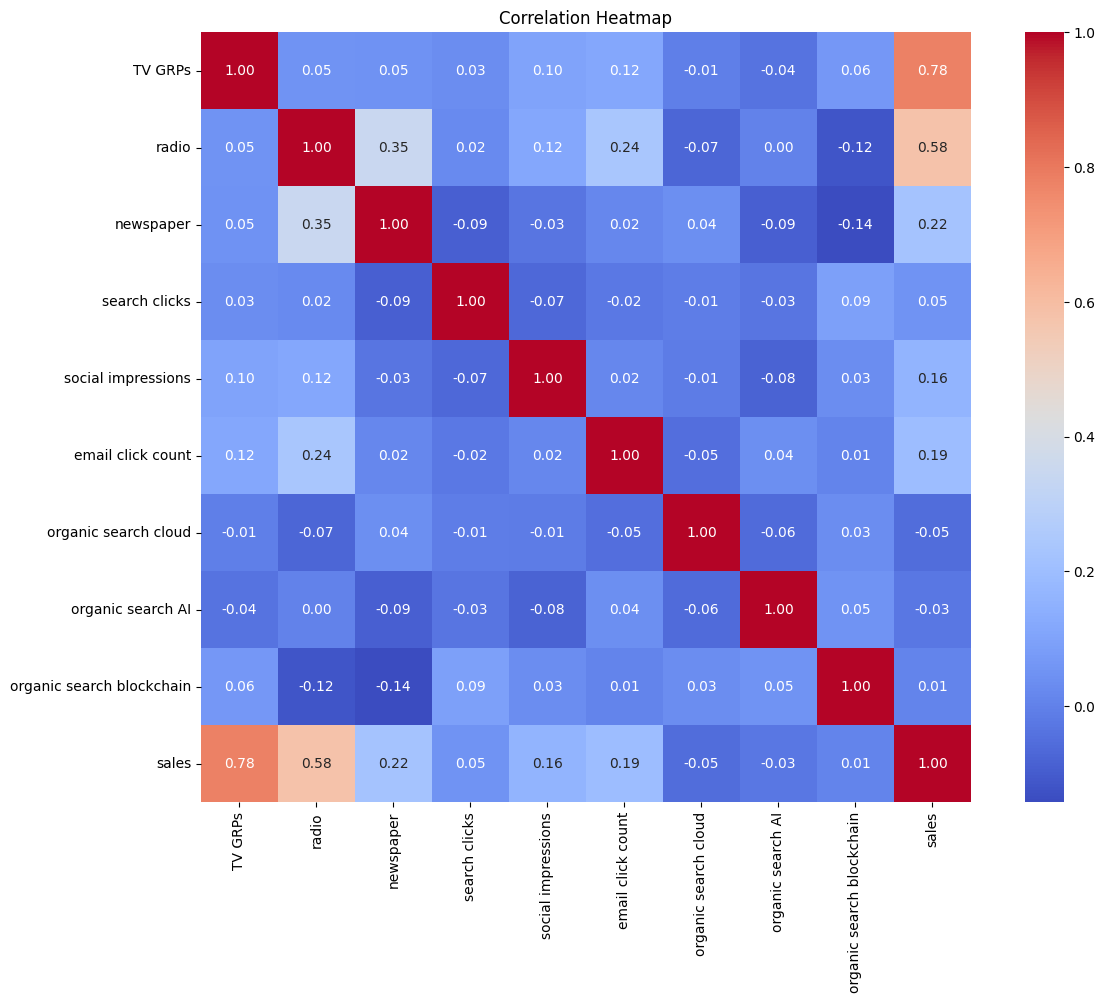

In [7]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Heatmap")
plt.show()

### Time-Series Plot


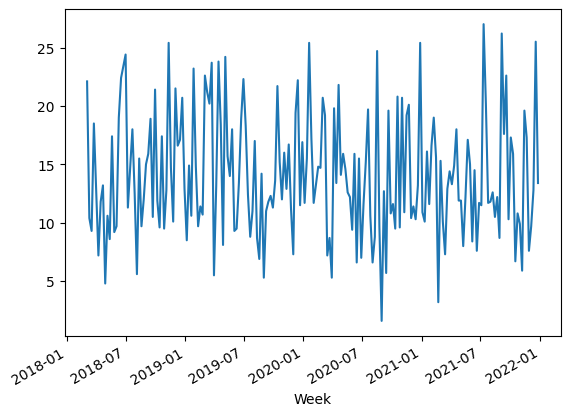

In [8]:
df['sales'].plot()
plt.show()

###Linear regression

In [9]:
# Prepare data
X = df.drop('sales', axis=1)
y = df['sales']

# Add a constant to X for the intercept term
X = sm.add_constant(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = sm.OLS(y_train, X_train)

# Fit the model
results = model.fit()

# Print the summary statistics of the regression model
print(results.summary())

# Prediction and evaluation
y_pred = results.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     142.4
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           2.93e-68
Time:                        23:27:53   Log-Likelihood:                -304.75
No. Observations:                 158   AIC:                             629.5
Df Residuals:                     148   BIC:                             660.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [10]:
# Required libraries
from scipy.stats import jarque_bera
import numpy as np

# Extract relevant statistics
summary = results.summary()
r2, adj_r2, f_stat = results.rsquared, results.rsquared_adj, results.fvalue
a, b, mse, params = results.aic, results.bic, results.mse_resid, results.params
dependent_var = model.endog_names

# Condition Number
cond_number = np.linalg.cond(X)

# Compute Jarque-Bera test
jb_value, jb_pvalue = jarque_bera(results.resid)

# Print summary
print("### Summary Statistics:")

def interpret_value(value, thresholds, interpretations):
    for thresh, interp in zip(thresholds, interpretations):
        if value >= thresh:
            return interp
    return interpretations[-1]

r2_interp = interpret_value(r2, [0.8, 0.7, 0.6, 0.5], ['an excellent fit.', 'a very good fit.', 'a good fit.', 'a moderate fit.', 'a poor fit.'])
adj_r2_interp = interpret_value(adj_r2, [0.8, 0.7, 0.6, 0.5], ['an excellent fit without unnecessary predictors.', 'a very good fit without unnecessary predictors.', 'a good fit without unnecessary predictors.', 'a moderate fit without unnecessary predictors.', 'a poor fit without unnecessary predictors.'])
f_stat_interp = interpret_value(f_stat, [10, 5], ['strongly suggesting that at least one of the predictors is significant.', 'moderately suggesting that at least one of the predictors may be significant.', 'weakly suggesting that the predictors may not be significant.'])
aic_bic_interp = 'Both AIC and BIC values are low, suggesting a good model fit.' if float(a) < 700 and float(b) < 700 else 'Either AIC or BIC is moderately high, indicating potential overfitting or that the model could be improved.' if (700 <= float(a) <= 1000) or (700 <= float(b) <= 1000) else 'Both AIC and BIC values are high, suggesting that the model may not fit the data well.'

print(f"\u2022 Dependent Variable:\nThe dependent variable is '{dependent_var}'.")
print(f"\u2022 R-squared:\nThe R-squared value is {r2:.3f}, indicating {r2_interp}")
print(f"\u2022 Adjusted R-squared:\nThe adjusted R-squared is {adj_r2:.3f}, {adj_r2_interp}")
print(f"\u2022 F-statistic:\nThe F-statistic is {f_stat:.1f}, {f_stat_interp}")
print(f"\u2022 AIC and BIC:\nAIC is {a} and BIC is {b}. {aic_bic_interp}")
print(f"\u2022 Mean Squared Error:\nThe mean squared error is {mse:.4f}.")

print("\n### Individual Predictors:")
for param in params.index:
    coef = params[param]
    p_value = results.pvalues[param]
    significance = "significant" if p_value < 0.05 else "not statistically significant"
    print(f"\u2022 {param}:\nThe coefficient is {coef:.4e} with a p-value of {p_value:.3f}. This suggests that the predictor is {significance}.")

print("\n### Diagnostics and Cautions:")
cond_number_interp = 'This is a large value, indicating potential multicollinearity or other numerical problems.' if cond_number > 1000 else 'This is a moderate value; multicollinearity is likely not a concern.' if cond_number > 100 else 'This is a small value, suggesting that multicollinearity is likely not an issue.'
print(f"\u2022 Condition Number:\nThe condition number is {cond_number}. {cond_number_interp}")
print(f"\u2022 Skewness and Kurtosis:\nThe Jarque-Bera test statistic is {jb_value:.2f} with a p-value of {jb_pvalue:.2e}. {'The test suggests that the residuals are not normally distributed, violating one of the OLS assumptions.' if jb_pvalue < 0.05 else 'The test suggests that the residuals are normally distributed, satisfying one of the OLS assumptions.'}")


### Summary Statistics:
• Dependent Variable:
The dependent variable is 'sales'.
• R-squared:
The R-squared value is 0.896, indicating an excellent fit.
• Adjusted R-squared:
The adjusted R-squared is 0.890, an excellent fit without unnecessary predictors.
• F-statistic:
The F-statistic is 142.4, strongly suggesting that at least one of the predictors is significant.
• AIC and BIC:
AIC is 629.4983798482542 and BIC is 660.1243301785239. Both AIC and BIC values are low, suggesting a good model fit.
• Mean Squared Error:
The mean squared error is 2.9597.

### Individual Predictors:
• const:
The coefficient is 2.5412e+00 with a p-value of 0.000. This suggests that the predictor is significant.
• TV GRPs:
The coefficient is 4.4993e-02 with a p-value of 0.000. This suggests that the predictor is significant.
• radio:
The coefficient is 1.8236e-01 with a p-value of 0.000. This suggests that the predictor is significant.
• newspaper:
The coefficient is 6.8111e-03 with a p-value of 0.355. This 